<a href="https://colab.research.google.com/github/rr4333-create/MLDA-SUBMISSION-/blob/main/MLDA_OBSERVATION_PROGRAMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXP 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Load dataset
data = pd.read_csv("players_15.csv", encoding="latin1")
print("First 5 rows of dataset:")
print(data.head())

# 2. Identify numeric and categorical columns
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
cat_features = data.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric Features:", num_features[:10])   # showing first 10 only
print("Categorical Features:", cat_features[:10])

# 3. Preprocessing for numeric data
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# 4. Preprocessing for categorical data
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# 5. Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features)
    ]
)

preprocessor.set_output(transform="pandas")

# 6. Apply preprocessing
data_preprocessed = preprocessor.fit_transform(data)
print("\nPreprocessed Data (first 5 rows):")
print(data_preprocessed.head())

# 7. Example Feature Engineering (if relevant column exists)
if "overall" in data.columns and "potential" in data.columns:
    data_preprocessed["potential_diff"] = data["potential"] - data["overall"]

# 8. Define input (X) and output (y)
# Let's predict player's "overall" rating (if exists)
if "overall" in data.columns:
    X = data_preprocessed.drop(columns=["overall"], errors="ignore")
    y = data["overall"]

    # 9. Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print("\nX_train sample:")
    print(X_train.head())
    print("\ny_train sample:")
    print(y_train.head())
else:
    print("\nColumn 'overall' not found, please specify target column for y.")

First 5 rows of dataset:
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi      Lionel AndrÃ©s Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3    Z. IbrahimoviÄ                  Zlatan IbrahimoviÄ   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality                 club  ...   lwb   ldm  \
0        169         67  

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['release_clause_eur' 'mentality_composure']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


EXP 2

Slope (m): 0.6797901896293875
Intercept (c): 47.1147642947799


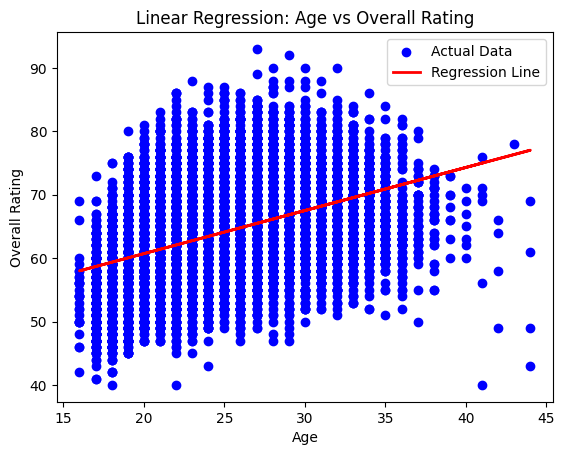

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = '/content/players_15.csv'
df = pd.read_csv(file_path)

# Select features
X = df[['age']]       # Independent variable
Y = df[['overall']]   # Dependent variable

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predict values
y_pred = model.predict(X)

# Output model parameters
print("Slope (m):", model.coef_[0][0])
print("Intercept (c):", model.intercept_[0])

# Plot actual vs predicted
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Linear Regression: Age vs Overall Rating')
plt.legend()
plt.show()

Slope (m): 0.6793808768218785
Intercept (c): 47.092083995281726


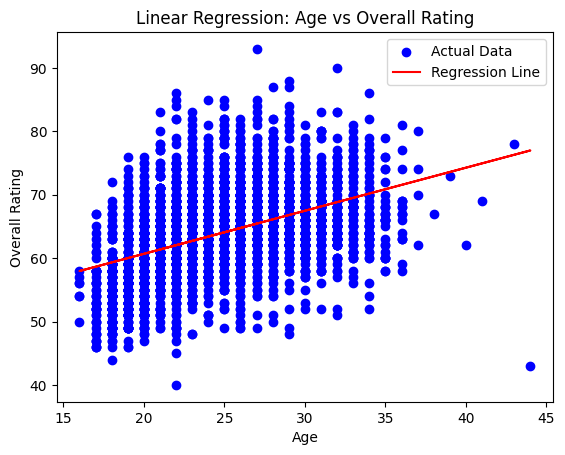

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
file_path = '/content/players_15.csv'
data = pd.read_csv(file_path)

# Select features
X = data[['age']]       # Feature: Player Age
y = data['overall']     # Target: Player Overall Rating

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Output model parameters
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Linear Regression: Age vs Overall Rating')
plt.legend()
plt.show()

EXP 3

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Load dataset
file_path = '/content/players_15.csv'
data = pd.read_csv(file_path)

# Select numeric features and target
X = data[['age', 'height_cm', 'weight_kg']]

# Create binary classification target: overall ≥ 75 → 1 (high rating), else 0
y = (data['overall'] >= 75).astype(int)

# Initialize classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=1000)

# Define 10-fold cross-validation
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores1 = cross_val_score(clf1, X, y, cv=k_folds)
scores2 = cross_val_score(clf2, X, y, cv=k_folds)

# Output results
print("Decision Tree CV Scores:", scores1)
print("Logistic Regression CV Scores:", scores2)
print("Decision Tree Average CV Score:", scores1.mean())
print("Logistic Regression Average CV Score:", scores2.mean())
print("Number of CV Scores used in Average (Decision Tree):", len(scores1))
print("Number of CV Scores used in Average (Logistic Regression):", len(scores2))

Decision Tree CV Scores: [0.89334195 0.89269554 0.89915966 0.89398836 0.89334195 0.89650712
 0.8919793  0.90491591 0.89715395 0.89780078]
Logistic Regression CV Scores: [0.92630899 0.92501616 0.92889463 0.93341952 0.91984486 0.92173351
 0.91591203 0.93337646 0.92561449 0.92884864]
Decision Tree Average CV Score: 0.8960884522980255
Logistic Regression Average CV Score: 0.9258969285793729
Number of CV Scores used in Average (Decision Tree): 10
Number of CV Scores used in Average (Logistic Regression): 10


EXP 4

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load dataset
file_path = '/content/players_15.csv'
data = pd.read_csv(file_path)

# Prepare features and target
X = data[['age', 'height_cm', 'weight_kg', 'potential']]
y = (data['overall'] >= 75).astype(int)  # Binary target: 1 if overall >= 75, else 0

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Accuracy:", accuracy_dt)

# Linear Regression
lrr = LinearRegression()
lrr.fit(x_train, y_train)
y_lrr_pred = lrr.predict(x_test)

mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2 Score:", r2)

Decision Tree Accuracy: 0.9754283866795991
Linear Regression MSE: 0.0494860104603536
Linear Regression R2 Score: 0.28957157705133485


EXP 5

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = '/content/players_15.csv'
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

# Prepare features and target
X = data[['age', 'height_cm', 'weight_kg', 'potential']]
y = data['overall']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Linear Regression Model
lrr = LinearRegression()
lrr.fit(x_train, y_train)

# Make predictions
y_lrr_pred = lrr.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality                 club  ...   lwb   ldm  \
0        169         67    Argentina         FC Ba

EXP 6

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
file_path = '/content/players_15.csv'
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())

# Prepare features and target
X = data[['age', 'height_cm', 'weight_kg', 'potential']]
y = (data['overall'] >= 75).astype(int)  # Binary classification target

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Logistic Regression Model
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

# Make predictions
y_lr_pred = lr.predict(x_test)

# Output shapes and accuracy
print("y_test shape:", y_test.shape)
print("y_lr_pred shape:", y_lr_pred.shape)
accuracy_lr = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", accuracy_lr)

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/15...   
3      41236  https://sofifa.com/player/41236/zlatan-ibrahim...   
4     167495  https://sofifa.com/player/167495/manuel-neuer/...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   27  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   29  1985-02-05   
2          A. Robben                         Arjen Robben   30  1984-01-23   
3     Z. Ibrahimović                   Zlatan Ibrahimović   32  1981-10-03   
4           M. Neuer                         Manuel Neuer   28  1986-03-27   

   height_cm  weight_kg  nationality                 club  ...   lwb   ldm  \
0        169         67    Argentina         FC Ba